# Gradient Boosting

**Importing the Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

**Importing the Data**

In [2]:
data = pd.read_csv("mushrooms.csv")
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


**Splitting the data into the Independent and Dependent Data**

In [3]:
x = data.drop(columns="class")
x = pd.get_dummies(x, drop_first=True)
y = data["class"]

**Splitting the Data into the Training and Testing Data**

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=16)

**Implementing the Model with Grid Search CV**

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators": [50, 100, 150, 200], "learning_rate": [0.1, 0.2, 0.05], "max_depth": [3, 4, 5]}

gbc = GradientBoostingClassifier()

grid = GridSearchCV(gbc, param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.2, 0.05],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 150, 200]})

**Evaluating the Performance Matrix**

In [6]:
y_pred = grid.predict(X_test)

print(grid.best_params_)

from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix -\n", confusion_matrix(y_test, y_pred))
print("Classification Report -\n", classification_report(y_test, y_pred))

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Confusion Matrix -
 [[853   0]
 [  0 772]]
Classification Report -
               precision    recall  f1-score   support

           e       1.00      1.00      1.00       853
           p       1.00      1.00      1.00       772

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625


**Checking the Best Features that this model got**

In [7]:
feat_important = pd.DataFrame(data=grid.best_estimator_.feature_importances_, index=x.columns, columns=["Importance"])

In [8]:
feat_important

,Importance
cap-shape_c,2.865013e-04
cap-shape_f,7.335534e-18
cap-shape_k,0.000000e+00
cap-shape_s,0.000000e+00
cap-shape_x,0.000000e+00
...,...
habitat_l,3.552972e-04
habitat_m,2.506797e-16
habitat_p,0.000000e+00
habitat_u,6.178740e-03


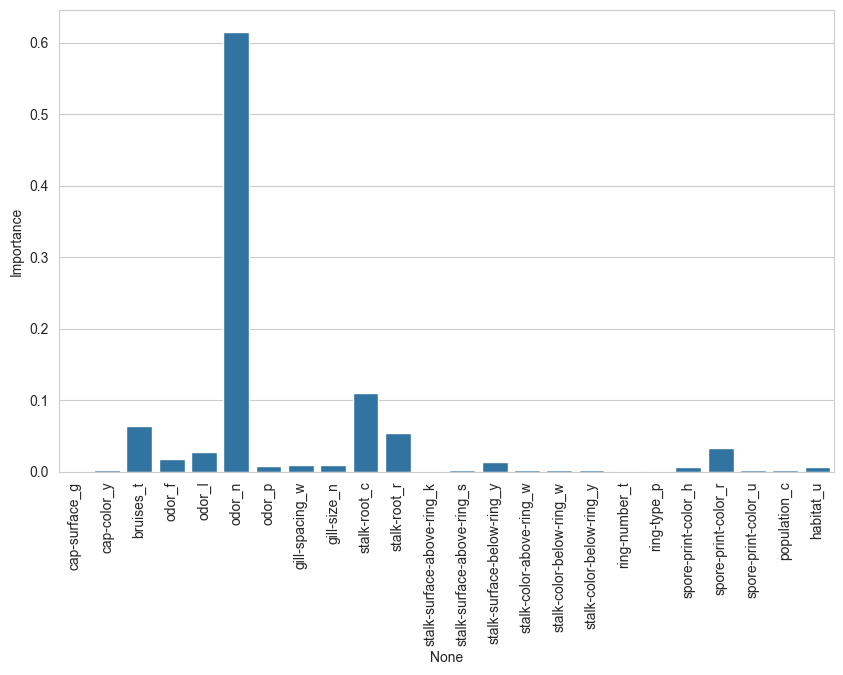

In [9]:
plt.figure(figsize=(10, 6), dpi=100)
sns.barplot(data = feat_important[feat_important["Importance"]>0.0005], x=feat_important[feat_important["Importance"]>0.0005].index, y="Importance")
plt.xticks(rotation=90);